In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### Loading Clean Data

In [2]:
data = pd.read_csv('export_dataframe.csv')
print('The shape of the overall database is: ', data.shape)
# data.drop(['lead_time'],axis=1)
data.head()

The shape of the overall database is:  (116959, 25)


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,0,0,0,A,No Deposit,0.0,0.0,0,Transient,75.0,0,0
1,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,0,0,0,A,No Deposit,304.0,0.0,0,Transient,75.0,0,0
2,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,TA/TO,0,0,0,A,No Deposit,240.0,0.0,0,Transient,98.0,0,1
3,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,TA/TO,0,0,0,A,No Deposit,240.0,0.0,0,Transient,98.0,0,1
4,Resort Hotel,0,0,July,27,1,0,2,2,0.0,0,BB,Direct,0,0,0,C,No Deposit,0.0,0.0,0,Transient,107.0,0,0


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [5]:
# bookings = data[['is_canceled', 'lead_time', 'hotel', 'distribution_channel', 'deposit_type', 'customer_type', 'is_repeated_guest']]
# data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'distribution_channel', 'deposit_type', 'customer_type', 'is_repeated_guest'])
data_dummies=pd.get_dummies(data=data, columns=['hotel', 'distribution_channel', 'deposit_type', 'customer_type', 'is_repeated_guest','arrival_date_month','meal','reserved_room_type'])
# data_dummies=pd.get_dummies(data=data.drop(['reserved_room_type'],axis=1))
# data_dummies=pd.get_dummies(data=data)
print(data_dummies.shape)
data_dummies.head()

(116959, 58)


,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_0,is_repeated_guest_1,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
0,0,7,27,1,0,1,1,0.0,0,0,0,0.0,0.0,0,75.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,13,27,1,0,1,1,0.0,0,0,0,304.0,0.0,0,75.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,14,27,1,0,2,2,0.0,0,0,0,240.0,0.0,0,98.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,14,27,1,0,2,2,0.0,0,0,0,240.0,0.0,0,98.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,27,1,0,2,2,0.0,0,0,0,0.0,0.0,0,107.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
random_state=10
X = data_dummies.drop(['is_canceled'], axis=1).values
y = data_dummies['is_canceled']
# y = data_dummies[['is_canceled','hotel_City Hotel']]

# X = SelectKBest(chi2, k=k).fit_transform(X, y)
# X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# y_train,train_hotel_name=y_train.is_canceled,y_train['hotel_City Hotel']
# y_test,test_hotel_name=y_test.is_canceled,y_test['hotel_City Hotel']

### the dataset visualization

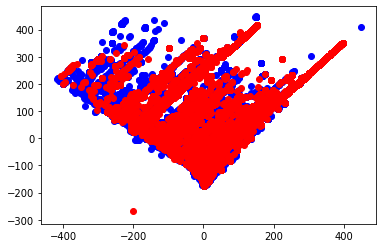

In [11]:
pca = PCA(n_components=2)
pca.fit(X)
newdata=pca.transform(X)
y1=[]
y2=[]
for i in range(0,len(newdata)):
    if(y[i]==0):
        y1.append(newdata[i][0])
        y2.append(newdata[i][1])  
plt.scatter(y1,y2,color='blue')
y1=[]
y2=[]
for i in range(0,len(newdata)):
    if(y[i]==1):
        y1.append(newdata[i][0])
        y2.append(newdata[i][1])  
plt.scatter(y1,y2,color='red')
plt.show()

In [12]:
predict_dict={}

### DecisionTree Model prediction

In [13]:
model_t = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
model_t.fit(X_train, y_train)
y_pred = model_t.predict(X_test)
DT=accuracy_score(y_test, y_pred)
predict_dict['DT']=round(DT,2)
print('Score :', DT)

Score : 0.83015560875513


### KNN Model prediction

In [14]:
model_k = KNN(n_neighbors=4)
model_k.fit(X_train, y_train)
y_pred = model_k.predict(X_test)
KNN=accuracy_score(y_test, y_pred)
predict_dict['KNN']=round(KNN,2)
print('Score :',KNN )

Score : 0.7851829685362517


### LR Model prediction

In [15]:
model_l = LogisticRegression(random_state=random_state, solver='liblinear')
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
LR=accuracy_score(y_test, y_pred)
predict_dict['LR']=round(LR,2)
print('Score :',LR )

Score : 0.7928351573187414


### Random Forest Prediction

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
RF = accuracy_score(y_test, y_pred)
predict_dict['RF']=round(RF,2)
print('Accuracy of Random Forest Classifier: {:.3f}'.format(RF))

Accuracy of Random Forest Classifier: 0.867


### CNN method

Train on 74853 samples, validate on 18714 samples
Epoch 1/10
74853/74853 [==============================] - 14s 193us/step - loss: 0.4987 - accuracy: 0.7576 - val_loss: 0.5243 - val_accuracy: 0.7321
Epoch 2/10
74853/74853 [==============================] - 15s 206us/step - loss: 0.4449 - accuracy: 0.7904 - val_loss: 0.4870 - val_accuracy: 0.7654
Epoch 3/10
74853/74853 [==============================] - 16s 215us/step - loss: 0.4366 - accuracy: 0.7945 - val_loss: 0.4478 - val_accuracy: 0.7879
Epoch 4/10
74853/74853 [==============================] - 16s 220us/step - loss: 0.4293 - accuracy: 0.7975 - val_loss: 0.4211 - val_accuracy: 0.8037
Epoch 5/10
74853/74853 [==============================] - 13s 173us/step - loss: 0.4263 - accuracy: 0.7996 - val_loss: 0.4646 - val_accuracy: 0.7685
Epoch 6/10
74853/74853 [==============================] - 13s 170us/step - loss: 0.4193 - accuracy: 0.8032 - val_loss: 0.4171 - val_accuracy: 0.8125
Epoch 7/10
74853/74853 [==============================] 

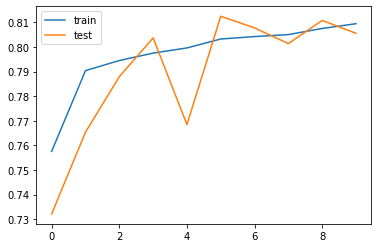

23392/23392 [==============================] - 2s 74us/step
Accuracy: 80.93


In [33]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
import keras

model_B = Sequential()
# model_B.add(Flatten())
model_B.add(Dense(100,input_dim=X_train.shape[1]))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())
model_B.add(Dense(100))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())
model_B.add(Dense(100))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())
model_B.add(Dense(100))
model_B.add(Activation('relu'))
model_B.add(BatchNormalization())
model_B.add(Dense(2))
model_B.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999,decay=1e-6)# best one

model_B.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
early_stopping_monitor = EarlyStopping(patience=2)
# model_B.fit(X_train,y_train,batch_size=32,
#               epochs=5)
history = model_B.fit(X_train,y_train, validation_split=0.2, epochs=10, callbacks=[early_stopping_monitor])
# evaluate the model_B
_, train_acc = model_B.evaluate(X_train,y_train)
_, test_acc = model_B.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

_, accuracy = model_B.evaluate(X_test, y_test)
# _, accuracy = model_B.evaluate(X_train, y_train)
predict_dict['CNN']=accuracy
print('Accuracy: %.2f' % (accuracy*100))

### Compare Performance of different models

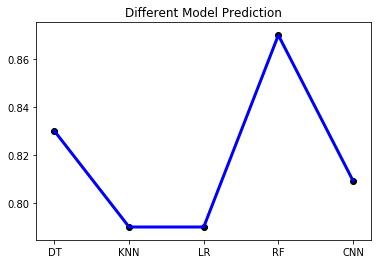

In [34]:
plt.plot(list(predict_dict.keys()),list(predict_dict.values()))
plt.title("Different Model Prediction")
plt.scatter(list(predict_dict.keys()),list(predict_dict.values()),  color='black')
plt.plot(list(predict_dict.keys()),list(predict_dict.values()), color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()